<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Итоги-предобработки" data-toc-modified-id="Итоги-предобработки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Итоги предобработки</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Итоги-расчетов" data-toc-modified-id="Итоги-расчетов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Итоги расчетов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Итоги-анализа-данных" data-toc-modified-id="Итоги-анализа-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итоги анализа данных</a></span></li><li><span><a href="#Итоги-анализа-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Итоги-анализа-квартир-в-центре-Санкт-Петербурга-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Итоги анализа квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.  Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('d:\\documents\\ds\\real_estate_data.csv', sep='\t')
# df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Проверка наличия пропусков
print('Количество пропусков:', '\n', df.isna().sum(), '\n')
print('Количество строк с пропусками:', df.isna().any(axis=1).sum())

Количество пропусков: 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64 

Количество строк с пропусками: 23449


In [4]:
# Проверка на аномальные значения в столбцах, которые содержат небольшой набор значений.
for i in list(df):
    if i in ('balcony', 'floor', 'is_apartment', 'open_plan', 'parks_around3000', 'ponds_around3000', 'rooms', 'studio'):
        print('Данные по столбцу -', i)
        print(df[i].value_counts(), '\n')

Данные по столбцу - rooms
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64 

Данные по столбцу - floor
2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64 

Данные по столбцу - is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64 

Данные по столбцу - studio
False    23550
True       149
Name: studio, dtype: int64 

Данные по столбцу - open_plan
False    23632
True        67
Name: open_plan, dtype: int64 

Данные по столбцу - balcony
1.0    4195
0.0    3758
2.0    3659
5.0 

ceiling_height
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 



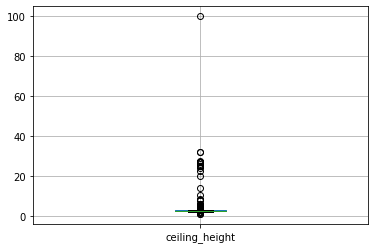


airports_nearest
count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64 



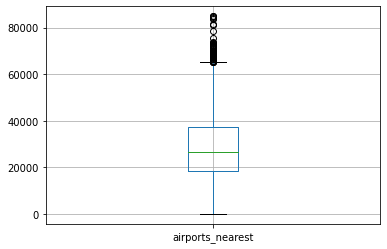


cityCenters_nearest
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64 



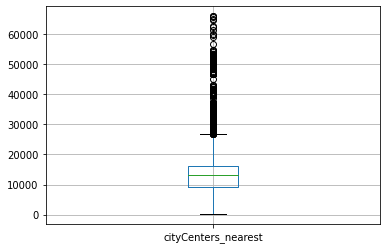


parks_nearest
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64 



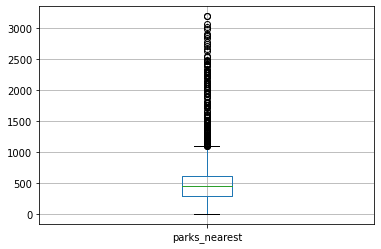


ponds_nearest
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64 



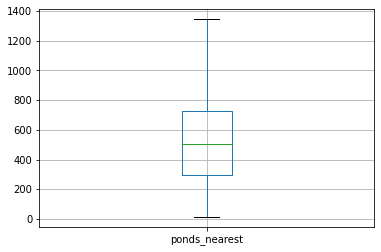


last_price
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64 



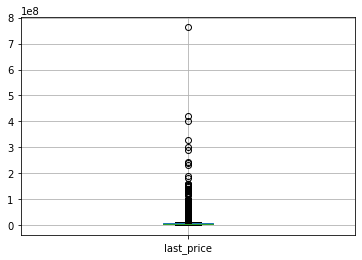


days_exposition
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64 



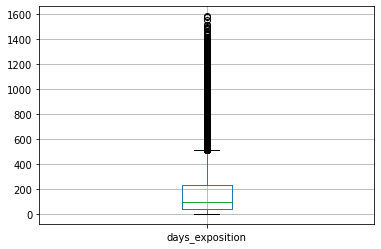


living_area
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64 



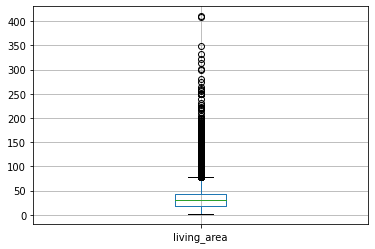


total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64 



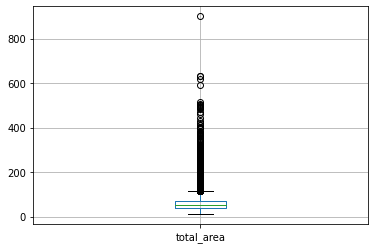


total_images
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64 



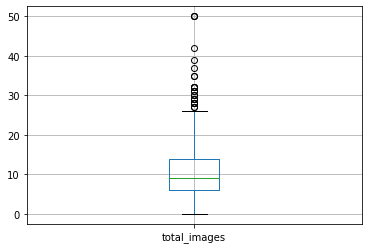

In [5]:
# Проверка на аномальные значения в столбцах, которые содержат большой набор значений.
columns = ('ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest',
           'ponds_nearest', 'last_price', 'days_exposition', 'living_area',
           'total_area', 'total_images')
for column in columns:
    print(column)
    print(df[column].describe(), '\n')
    boxplot = df.boxplot(column=[column])
    plt.show()
    print()

### Вывод

Полученный датасет содержит 23699 строк и 22 столбца.  
Врезультате изучения датасета обнаружены пропущенные значения в 14 столбцах  из 22. Пропущенныезначения содержат 23449 строк.  
В стобце "ceiling_height" есть аномальные значения высотs потолка: менее 2 м. и больше 10 м.  
В столбце "airports_nearest" есть расстояние до аэропорта равное 0 м.  
В стлобце "rooms" есть значения равные 0.  
В стлобцах "total_area", "living_area" есть значения площади менее 14 м. кв.

## Предобработка данных

In [6]:
# Пропуски в количестве балконов заполняю "0"
df['balcony'].fillna(0, inplace=True)
df['balcony'] = df['balcony'].round().astype(int)

# Пропуски в вназвании населенного пункта заполняю "unknown"
df['locality_name'].fillna('unknown', inplace=True)

# Приведенение названий населенных пунктов к короткому названию и создание столбца с короткими названиями
remove_words = ['поселок городского типа ', 'городской посёлок ', 'коттеджный посёлок ',
                'посёлок при железнодорожной станции ', 'посёлок станции ', 'городского типа ',
                'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'посёлок ',
                'станции ', 'поселок ', 'село ', 'деревня ']
sp = '|'.join(remove_words)
df['short_name'] = df.locality_name.str.lower().replace(sp,'', regex=True)

# Вывод строк с расстоянием до ближайшего аэропорта меньше 100 м. и удаление этой строки
print('Количество строк с расстоянием до ближайшего аэропорта меньше 100 м. -',
      df.query('airports_nearest < 14')['airports_nearest'].count())
df = df[(df['airports_nearest'] >= 100) | (df['airports_nearest'].isnull())]

# Заполнение пропусков в "Расстояние до ближайшего аэропорта в метрах" средним значением по населенному пункту
df.groupby('short_name').airports_nearest.apply(lambda r: r.fillna(r.mean()))

# Замена типа данных "расстояние до ближайшего аэропорта в метрах "
df['airports_nearest'] = df['airports_nearest'].round().astype('Int64')

# Удаление строк с высотой потолка меньше 2 м. или больше 10 м.
print('Количество строк с потолком ниже 2 м. или больше 10 м. -',
      df.query('ceiling_height < 2 or ceiling_height > 10')['ceiling_height'].count())
df = df[(df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 10) | (df['ceiling_height'].isnull())]

# Заполнение отстутвующих значений высоты потолка средними значеними потолков зданий с таким же количеством этажей
df['ceiling_height'] = df.groupby('floor').ceiling_height.apply(lambda r: r.fillna(r.median()))

# Заполнение остальных пропущеных значений высоты потолка среденей высотой потолка - 2,6 м
df['ceiling_height'].fillna(2.6, inplace=True)

# Заполнение отсутвующих значений в столбце "апартаменты (булев тип)"
df['is_apartment'].fillna(False, inplace=True)

# Заполнение отсутвующих значений "число парков в радиусе 3 км", замена типа данных
df['parks_around3000'].fillna(0, inplace=True)
df['parks_around3000'] = df['parks_around3000'].round().astype(int)

# Заполнение отсутвующих значений "число водоёмов в радиусе 3 км", замена типа данных
df['ponds_around3000'].fillna(0, inplace=True)
df['ponds_around3000'] = df['ponds_around3000'].round().astype(int)

# Заполнение отсутвующих значений "всего этажей в доме", замена типа данных, замена типа данных
df['floors_total'].fillna(1, inplace=True)
df['floors_total'] = df['floors_total'].round().astype(int)

# Заполнение отсутвующих значений в "площадь кухни в квадратных метрах"
df.loc[(df['kitchen_area'].isna()) & (df['open_plan']), 'kitchen_area'] = 0

# Удаление строк с жилой площадью меньше 14 м кв.
print('Количество строк с жилой площадью меньше 14 м кв. -',
      df.query('living_area < 14')['living_area'].count())
df = df[(df['living_area'] >= 14) | (df['living_area'].isnull())]

# Удаление строк с общей площадью меньше 14 м кв.
print('Количество строк с общей площадью меньше 14 м кв. -',
      df.query('total_area < 14')['total_area'].count())
df = df[(df['total_area'] >= 14) | (df['total_area'].isnull())]

# Удаление строк с количеством комнат 0.
print('Количество строк с количеством комнат 0 -',
      df.query('rooms == 0')['rooms'].count())
df = df[df['rooms'] != 0]


print('Количество строк с общей площадью жилья больше 550 м.кв. -', df.query('total_area > 550')['total_area'].count())
df = df[df['total_area'] <= 550]

print('Количество строк с жилой площадью жилья больше 290 м.кв. -', df.query('living_area > 290')['total_area'].count())
df = df[df['total_area'] <= 550]

print('Количество строк с ценой на момент снятия с публикации больше 200 млн. руб. -', df.query('last_price > 200000000')['total_area'].count())
df = df[df['last_price'] <= 200000000]

# Замена типа данных "сколько дней было размещено объявление"
df['days_exposition'] = df['days_exposition'].round().astype('Int64')

# Замена типа данных "дата публикации"
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
print()

# Вычисляем количество дубликатов
print('Количество дубликатов:', df.duplicated().sum(), '\n')
df.info()



Количество строк с расстоянием до ближайшего аэропорта меньше 100 м. - 1
Количество строк с потолком ниже 2 м. или больше 10 м. - 28
Количество строк с жилой площадью меньше 14 м кв. - 322
Количество строк с общей площадью меньше 14 м кв. - 3
Количество строк с количеством комнат 0 - 185
Количество строк с общей площадью жилья больше 550 м.кв. - 5
Количество строк с жилой площадью жилья больше 290 м.кв. - 5
Количество строк с ценой на момент снятия с публикации больше 200 млн. руб. - 7

Количество дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23148 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23148 non-null  int64         
 1   last_price            23148 non-null  float64       
 2   total_area            23148 non-null  float64       
 3   first_day_exposition  23148 non-null  datetime64[ns]
 4   rooms              

### Итоги предобработки

Были заполнены пропуски в столбцах:  
"balcony" заполнены 0  
"locality_name" заполнеы "unknown" так как нет возможностей определить населенный пункт  
"ceiling_height" заполнены средними значеними потолков зданий с таким же количеством этажей, оставшиеся пропуски значением 2,6 м.  
"is_apartment" заполнены False, так как жилье не аппартменты клиенты могут не указывать  
"parks_around3000", "ponds_around3000" заполнеы 0 так как отсутвующие парки и пруды клиенты могут не указывать  
"kitchen_area" при условии свободной планировки заполнеы 0  
"floors_total" заполнеы 1, так как этаж одноэтажнного дома клиенты могут не указать 

Заменен тип  данных:
"balcony", "floors_total", "days_exposition" на целые числа  
"first_day_exposition" на дату  

Был введен допонительный столбец с короткими названиями населенных пунктов.

Удалены строки:  
содержащие "ceiling_height" меньше 2 м и больше 6 м.  
содержащие "airports_nearest" меньше 100 м.  
содержащие "living_area", "total_area" меньше 14 кв. м., так как по  СНиПу минимальная жилая площадь 14 кв. м.  
содержащие "rooms" равное 0  
содержащие общую площадь жилья больше 550 м.кв  
содержащие жилую площадь больше 290 м.кв.  
содержащие жилую цену на момент снятия с публикации больше 200 млн. руб.  
 
Итого было удалено 548 строк, что составляет 2,3% датафрейма

## Расчёты и добавление результатов в таблицу

In [7]:
# Цена квадратного метра
df['price_m2'] = (df['last_price'] / df['total_area']).round().astype(int)

# День недели, месяц и год публикации объявления,
df['day_week_expo'] = df['first_day_exposition'].dt.dayofweek
df['month_expo'] = df['first_day_exposition'].dt.month
df['year_expo'] = df['first_day_exposition'].dt.year

# Функция для разбивки этажей квартир на категории
def floor(r):
    if r['floor'] == 1 and r['floors_total'] != 1:
        return 'первый'
    elif r['floor'] == r['floors_total'] and r['floors_total'] != 1:
        return 'последний'
    return 'другой'

# этаж квартиры (варианты — первый, последний, другой)
df['floor_cat'] = df.apply(floor, axis=1)

# Отношение жилой и общей площади,
df['liv_total'] = (df['living_area'] / df['total_area']).round(2)

# Отношение площади кухни к общей площади
df['kitchen_total'] = (df['kitchen_area'] / df['total_area']).round(2)

### Итоги расчетов

Выполнен расчет, и добавлены следующие столбцы:  
'price_m2' - цена квадратного метра  
'day_week_expo' - день недели публикации объявления  
'month_expo' - месяц публикации объявления  
'year_expo' - год публикации объявления  
'floor_cat' - этаж квартиры (варианты — первый, последний, другой)  
'liv_total' - отношение жилой к общей площади  
'kitchen_total' - отношение площади кухни к общей площади

## Исследовательский анализ данных

                     Гистограмма total_area


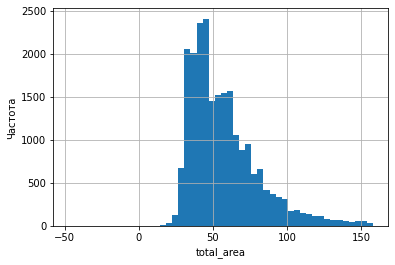

count    23148.000000
mean        60.734238
std         34.145122
min         15.000000
25%         40.700000
50%         52.700000
75%         70.000000
max        517.000000
Name: total_area, dtype: float64

                     Гистограмма last_price


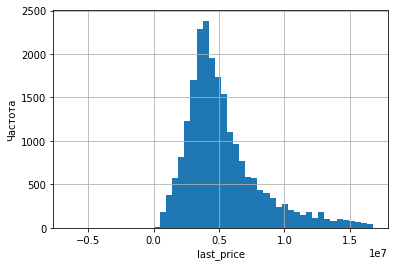

count    2.314800e+04
mean     6.454644e+06
std      7.845474e+06
min      1.219000e+04
25%      3.480000e+06
50%      4.699000e+06
75%      6.800000e+06
max      1.908700e+08
Name: last_price, dtype: float64

                     Гистограмма rooms


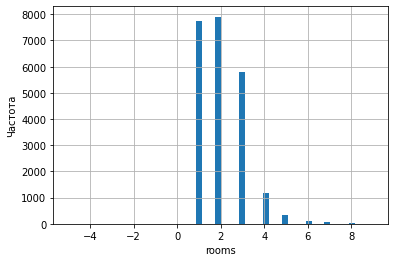

count    23148.000000
mean         2.099361
std          1.058154
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

                     Гистограмма ceiling_height


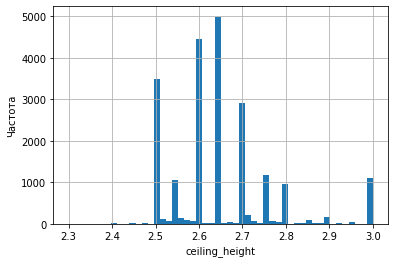

count    23148.000000
mean         2.695846
std          0.233657
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64



In [8]:
for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    print(' '*20, 'Гистограмма', i)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i].hist(range=(Q1-3*IQR, Q3+3*IQR), bins=50)
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()
    print(df[i].describe())
    print()

Анализ времени продажи квартиры

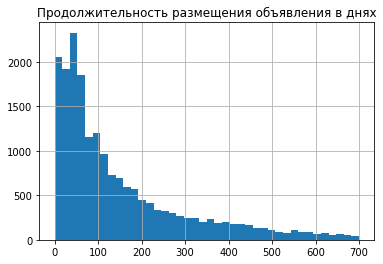

count    20020.000000
mean       181.926823
std        220.775349
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [9]:
df['days_exposition'].hist(range=(0, 700), bins=40)
plt.title('Продолжительность размещения объявления в днях')
plt.show()
print(df['days_exposition'].describe())

Наиболее активно жилье продается первые несколько месяцев после объявления.  
Так половина жилья продается в течении 3 месяцев после объявления, 75% в течении 230 дней, затем продажа осуществляется значительно медленнее

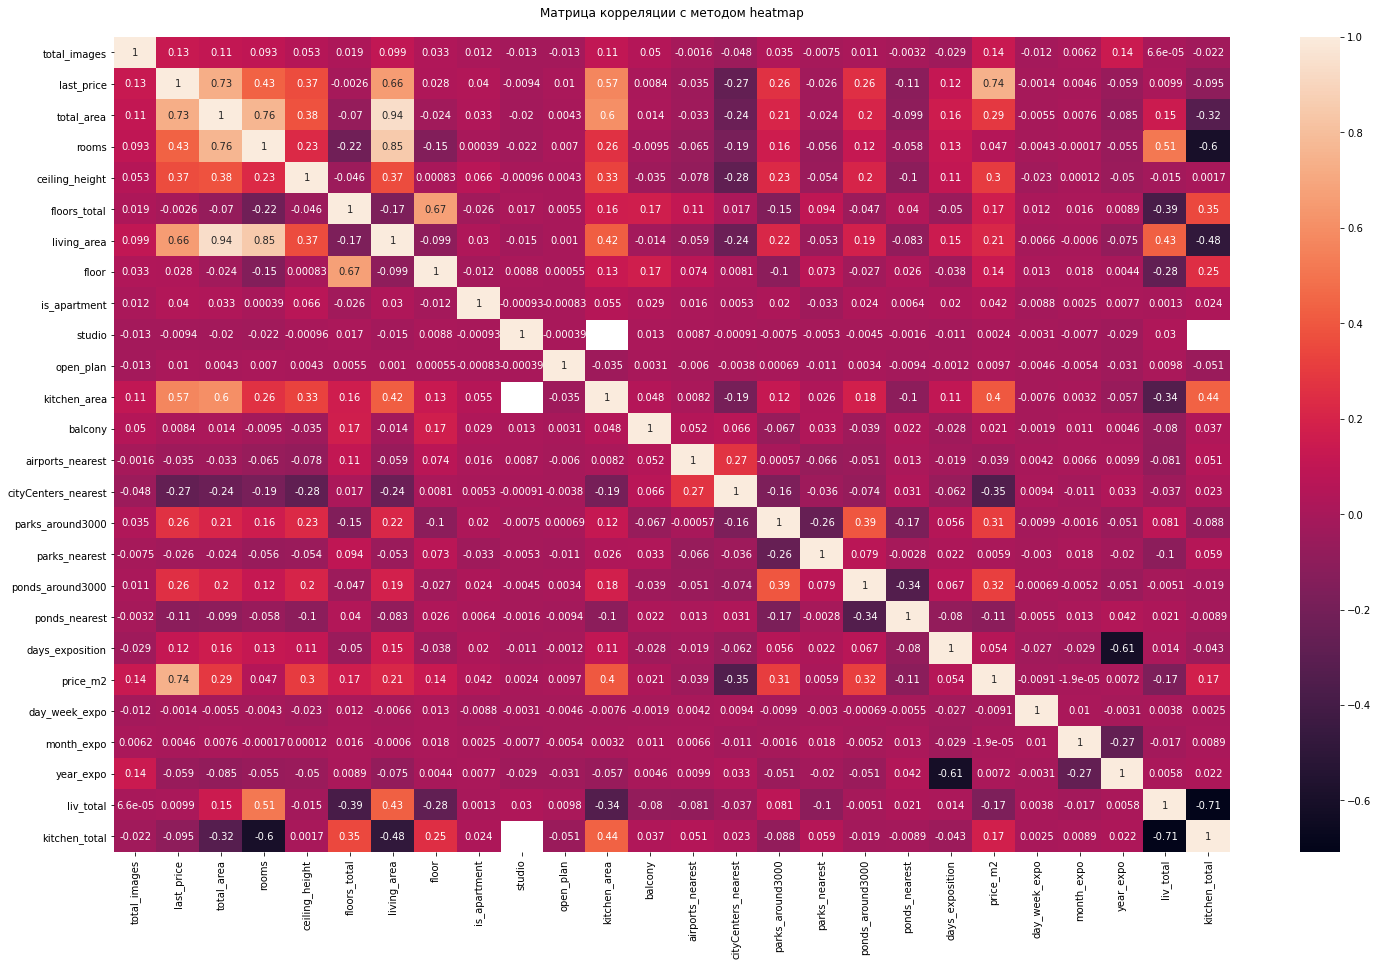

In [10]:
# Матрица корреляции с методом heatmap для всего датафрейма
plt.figure(figsize=(25, 15))
matr_corr = df.corr()
sns.heatmap(matr_corr, xticklabels=matr_corr.columns, yticklabels=matr_corr.columns, annot=True)
plt.rcdefaults()
plt.title('Матрица корреляции с методом heatmap', pad=20)
plt.show()

                     График зависимости цены жилья от floor_cat


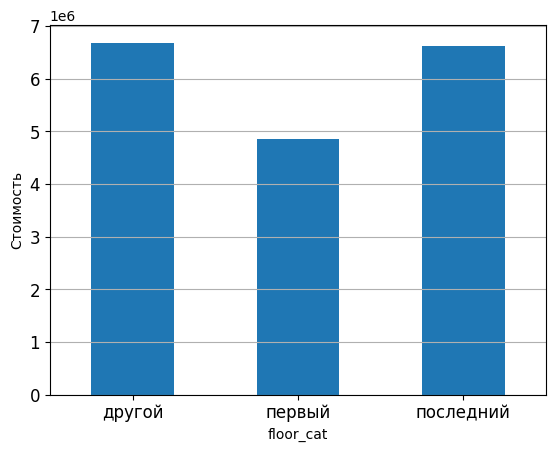

                     График зависимости цены жилья от rooms


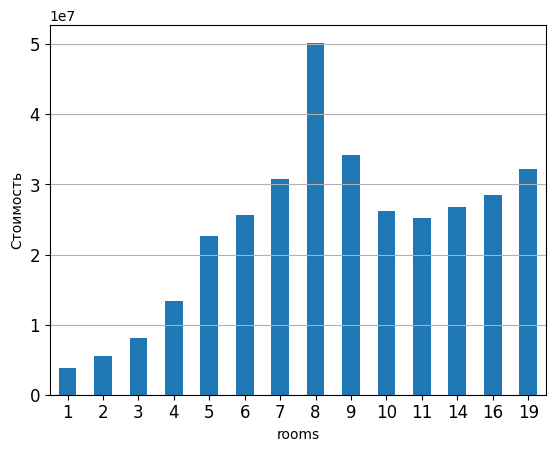

                     График зависимости цены жилья от day_week_expo


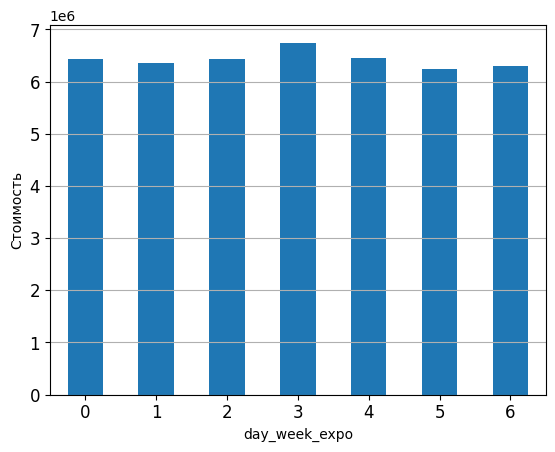

                     График зависимости цены жилья от month_expo


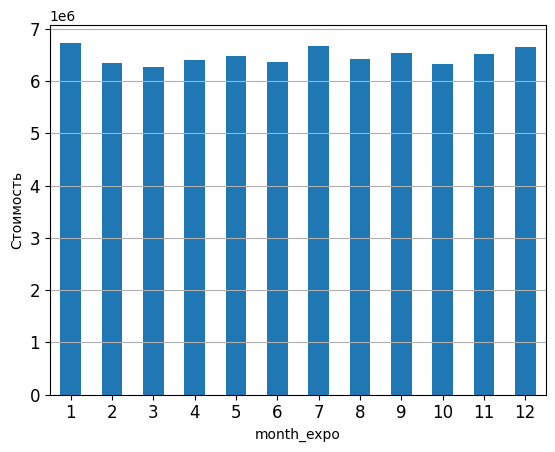

                     График зависимости цены жилья от year_expo


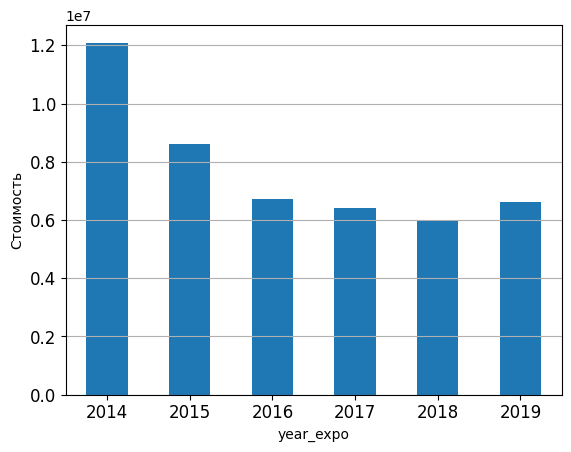

In [11]:
# Опредениее зависимости цены жилья от этажа, времени размещения (дня недели, месяца, года)
for i in ['floor_cat', 'rooms', 'day_week_expo', 'month_expo', 'year_expo']:
    print(' '*20, 'График зависимости цены жилья от', i)
    df.groupby(i)['last_price'].mean().plot(x=i, y='median', kind='bar', rot=0, fontsize=12)
    plt.ylabel('Стоимость')
    plt.grid(axis = 'y')
    plt.show()

### Итоги анализа данных

Наиболее часто продаются квартиры с площадью от 40 до 70 кв. м.  с ценами продажи от 3,5 до 6,8 млн. руб. Чаще всего продаются одно и двухкомнатные квартиры, реже трехкомнатные. Продажа квартир с количеством комнат выше 4-х очень редки. Большинство продаваемых квартир имеют потолки от 2,5 до 2,8 м.  
Наиболее активно жилье продается первые несколько месяцев после объявления.  Так половина жилья продается в течении 3 месяцев после объявления, 75% в течении 230 дней, затем продажа осуществляется значительно медленнее.  
Самое большое влияние на цену оказывает площадь квартиры, и число комнат, также влияют на цену год продажи, этаж. Незначительно оказывает влияние месяц продажи.


10 населённых пунктов с наибольшим числом объявлений  
Средняя стоимость квадратного метра жилья

In [12]:
# Список 10 населённых пунктов с наибольшим числом объявлений
top_10 = df['short_name'].value_counts().head(10)
top_10

санкт-петербург    15397
мурино               540
кудрово              443
шушары               423
всеволожск           385
пушкин               367
колпино              336
гатчина              305
парголово            303
выборг               235
Name: short_name, dtype: int64

In [13]:
# Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений
df.query('short_name in @top_10.index.values').groupby('short_name')['price_m2'].\
         mean().sort_values(ascending=False).round()

short_name
санкт-петербург    114094.0
пушкин             103117.0
кудрово             95116.0
парголово           89711.0
мурино              85342.0
шушары              77796.0
колпино             75395.0
гатчина             68947.0
всеволожск          68572.0
выборг              57975.0
Name: price_m2, dtype: float64

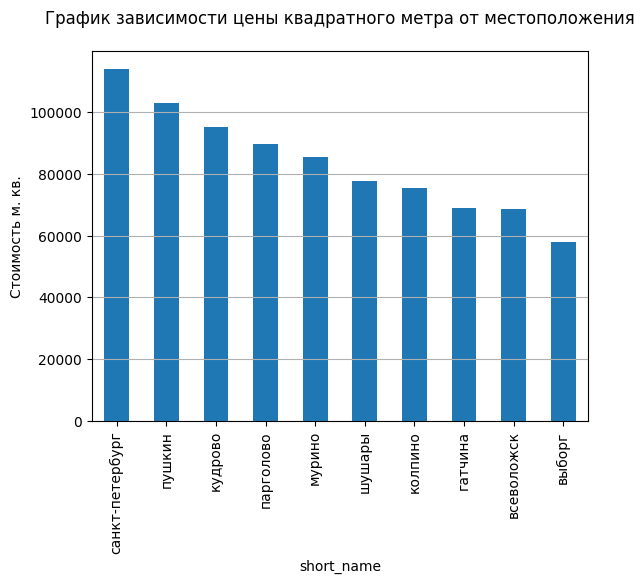

In [14]:
# График зависимости цены квадратного метра от местоположения
df.query('short_name in @top_10.index.values').groupby('short_name')['price_m2'].\
         mean().sort_values(ascending=False).round().plot(x='short_name', kind='bar', rot=90, fontsize=10)
plt.grid(axis = 'y')
plt.ylabel('Стоимость м. кв.')
plt.title('График зависимости цены квадратного метра от местоположения', pad=20)
plt.show()

Число строк 15397
Число пропусков в "cityCenters_nearest" 59


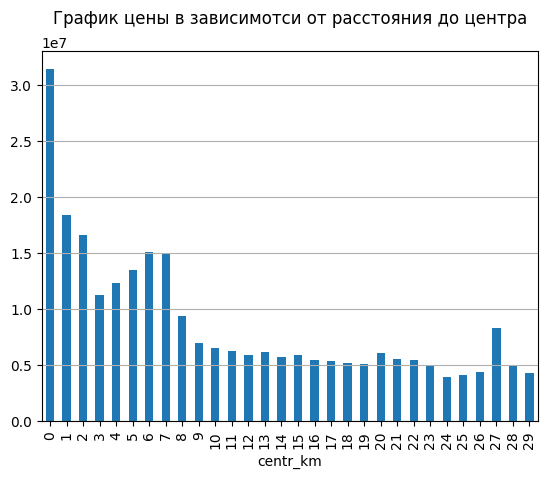

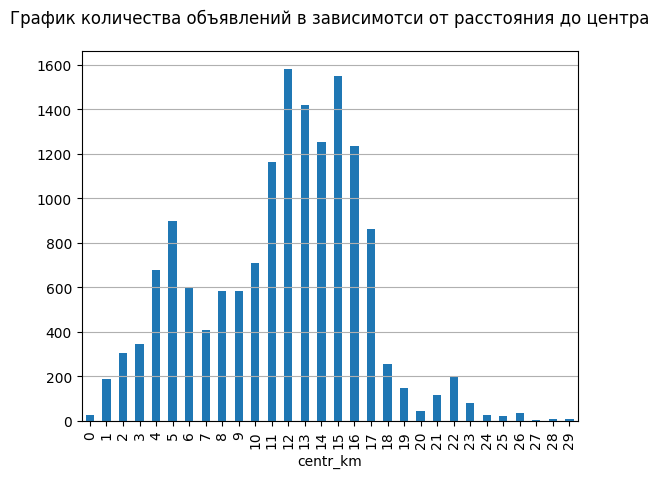

In [15]:
# Датафрейм с квартирами в Санкт-Петербурге
spb = df.query('short_name == "санкт-петербург"').copy()

# Удаление строк с пропусками
print('Число строк', spb['short_name'].count())
print('Число пропусков в "cityCenters_nearest"',spb['cityCenters_nearest'].isna().sum())
spb.dropna(subset=['cityCenters_nearest'], inplace=True)

# Создание столбца с расстоянием до центра в километрах
spb['centr_km'] = (spb['cityCenters_nearest'] / 1000).round().astype(int)

# График цены в зависимотси от расстояния до центра
df_plot = spb.groupby('centr_km')['last_price'].mean()
df_plot.plot(kind='bar')
plt.grid(axis = 'y')
plt.title('График цены в зависимотси от расстояния до центра', pad=20)
plt.show()

# График количества объявлений в зависимотси от расстояния до центра
df_plot2 = spb.groupby('centr_km')['last_price'].count()
df_plot2.plot(kind='bar')
plt.grid(axis = 'y')
plt.title('График количества объявлений в зависимотси от расстояния до центра', pad=20)
plt.show()

Область центр Санкт-Петербурга ограничивается 7 км. Снижение стоимости жилья в районе 3-4 км. возможно объясняется низким количеством предложений в этой области и особенностью застройки центра города.

In [16]:
# Датафрейм с квартирами в центре Санкт-Петербурга
spb_centr = spb.query('centr_km <=7').copy()

Анализ квартир в центре Санкт-Петербурга по
площади квартиры, цене, числу комнат, высоте потолков


                               Гистограмма total_area


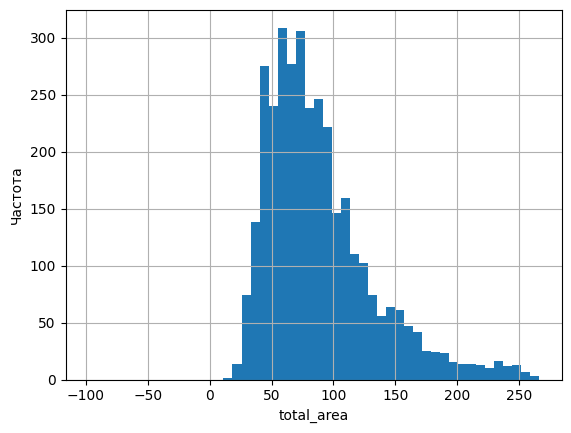

                               Гистограмма last_price


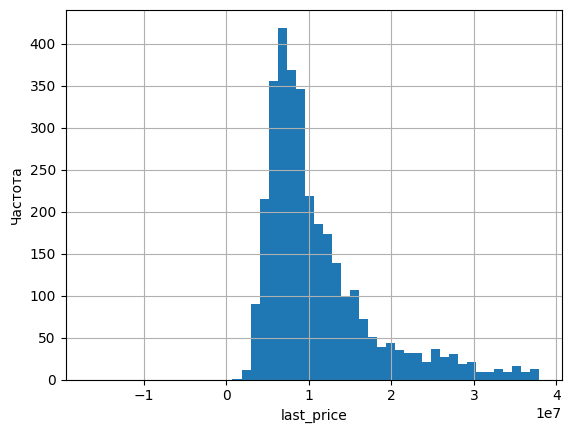

                               Гистограмма rooms


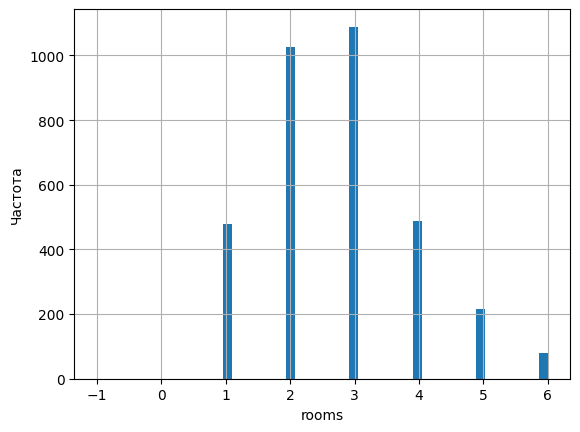

                               Гистограмма ceiling_height


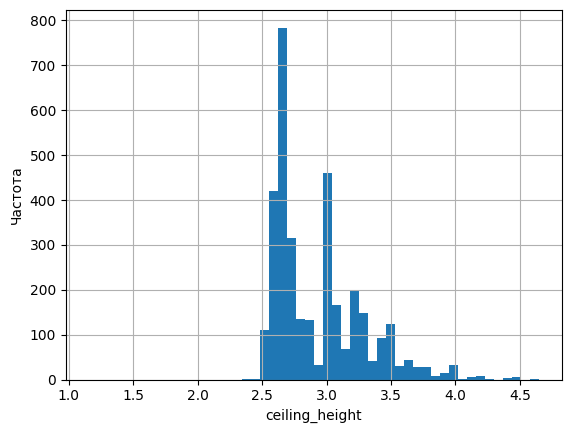

In [17]:
for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    print(' '*30, 'Гистограмма', i)
    Q1 = spb_centr[i].quantile(0.25)
    Q3 = spb_centr[i].quantile(0.75)
    IQR = Q3 - Q1
    spb_centr[i].hist(range=(Q1-3*IQR, Q3+3*IQR), bins=50)
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

Факторы влияющие на цену квартир в центре Санкт-Петербурга

                     График цены в зависимотси от centr_km


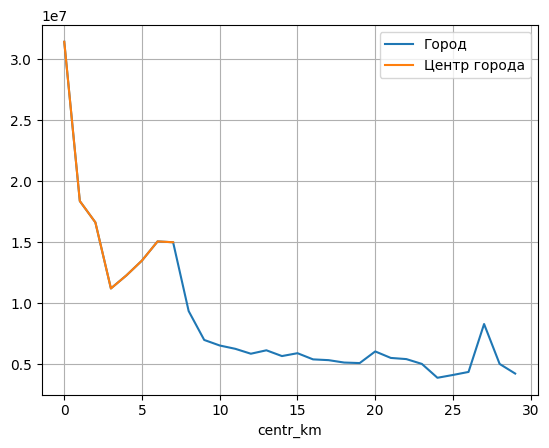


                     График цены в зависимотси от rooms


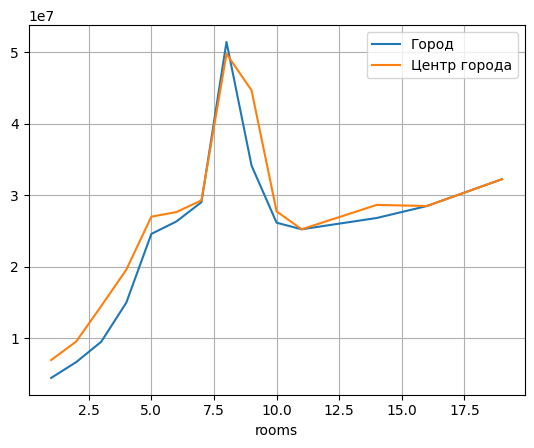


                     График цены в зависимотси от floor_cat


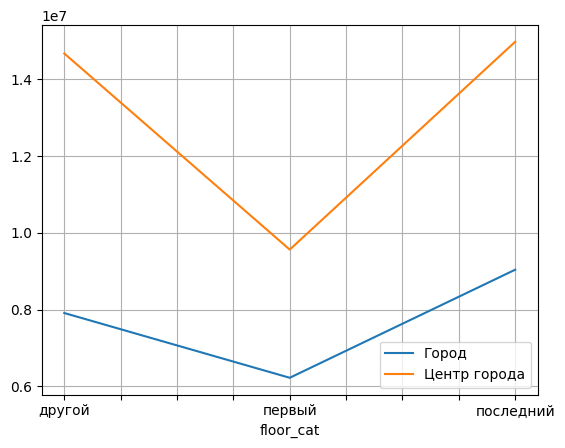


                     График цены в зависимотси от month_expo


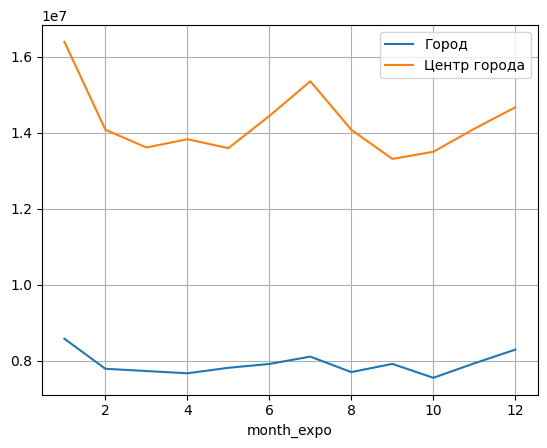


                     График цены в зависимотси от year_expo


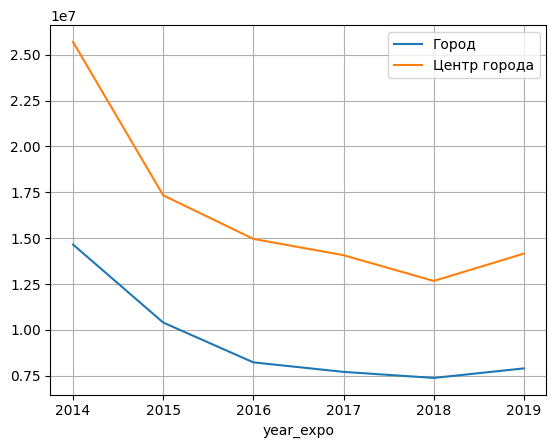

In [18]:
# График цены в зависимотси от расстояния до центра, количества комнат, этажа, месяца и года публикации
for i in ['centr_km', 'rooms', 'floor_cat', 'month_expo', 'year_expo']:
    print(' '*20, 'График цены в зависимотси от', i)
    spb_plot = spb.groupby(i)['last_price'].mean()
    spb_plot.plot(grid=True, label='Город')
    spb_spb_centr_plot = spb_centr.groupby(i)['last_price'].mean()
    spb_spb_centr_plot.plot(grid=True, label='Центр города')
    plt.legend()
    plt.show()
    print()

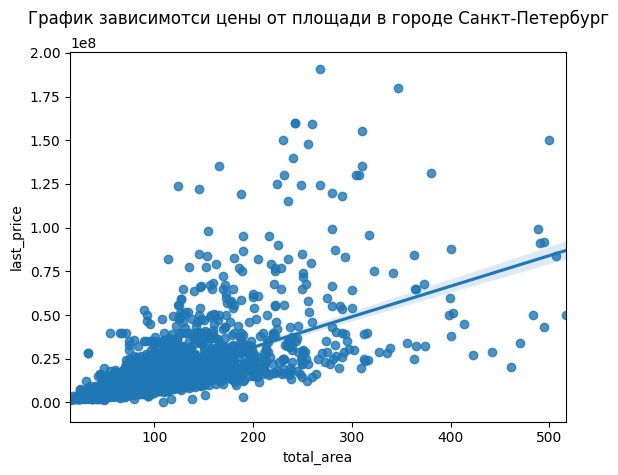

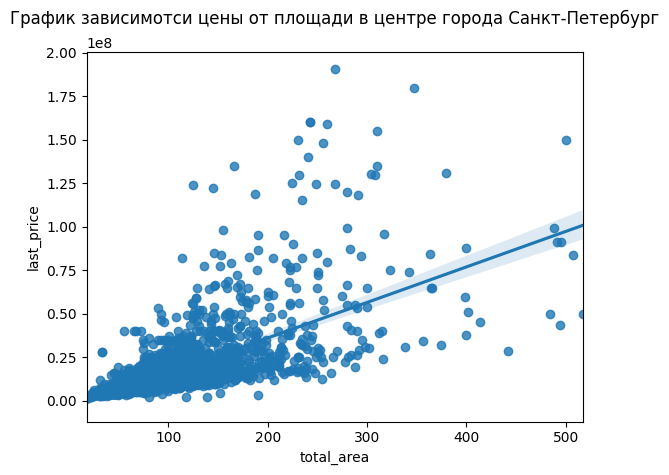

In [19]:
# График цены в зависимотси от площади по городу Санкт-Петербург
plt.title('График зависимотси цены от площади в городе Санкт-Петербург', pad=20)
print()
sns.regplot(x=spb['total_area'], y=spb['last_price'])
plt.show()

# График цены в зависимотси от площади по центру города Санкт-Петербург
plt.title('График зависимотси цены от площади в центре города Санкт-Петербург', pad=20)
sns.regplot(x=spb_centr['total_area'], y=spb_centr['last_price'])
plt.show()

### Итоги анализа квартир в центре Санкт-Петербурга

В центре Санкт-Петербурга зависимость цены от площади количества комнат, этажа, времени продажи такая же как остальном городе. В центре города более сильная зависимость цены от расстояния до центра города.

## Общий вывод

В проекте выполнено исследование продаж квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
Из предоставленного файла с датасетом был создан датафрейм.  Был проведен анализ данных на корретность значений, наличие пропусков. При анализе информации содержащейся в датафрейме были обнаружены аномальные данные, пропуски.  
Была проведена работа по исправлению некорректных данных.  

Часть пропущенных значений были заполнены данными на основании данных из других полей. Аномальные данные, содержание которых не превышало 5% были удалены. Числовые данные некоторых столбцов были преобразованы в целые числа.
Строковые значения с датой преобразован в формат даты. Был добавлен столбец с сокращенным названием населенных пунктов.   

Было выявлено что на цену жилья наибольшее влияние населённый пункт. В Санкт-Петербурге самая высокая стоимость. Также оказывает влияние площадь жилья, год размещения объявления о продажи, число комнат, категория этажа. Наибольшая цена на жилье была в 2014 году. Небольшое влияние оказывает месяц размещения объявления о продажи. В летние месяцы цена продажи жилья ниже, чем зимние.  

Были выбраны 10 населённых пунктов с наибольшим числом объявлений. Самая большая стоимость квадратного метра в Санкт-Петербурге, Пушкине, Кудрово самая низкая стоимость в Гатчине, Всеволожске, Выборге.  

Был выделен сегмент квартир в центре Санкт-Петербурга. Проведено исследование параметров жилья их влияние на цену в центре Санкт-Петербурга. Обнаружена сильная зависимость стоимости жилья от расстояния до центра Санкт-Петербурга. Для остальной части города эта зависимость гораздо слабее. В центре Санкт-Петербурга, как и остальной части города на цену жилья оказывают влияние площадь жилья, год размещения объявления о продажи, число комнат, категория этажа.